# **Introdução NLP**

### **`Bibliotecas`**

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import zipfile as zp

## **Aula 1: Classificação e exploração dos dados**

#### **Fazendo a leitura dos arquivos: - Duas formas de ler o arquivo 'Zipado'**

In [16]:
resenha = pd.read_csv('./imdb-reviews-pt-br.zip', compression = 'zip')
resenha.head(2)

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg


In [17]:

with zp.ZipFile('imdb-reviews-pt-br.zip') as f:
     arquivo_csv = f.namelist()[0]       # Nome do primeiro arquivo zipado
     resenha = pd.read_csv(f.open(arquivo_csv))
          
resenha.head(3)

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg


#### 
---

In [3]:
from sklearn.model_selection import train_test_split

train, test, class_train, class_test = train_test_split(resenha.text_pt,
                                                        resenha.sentiment,
                                                        random_state = 42)

In [4]:
class_train

1348     neg
27466    neg
29998    neg
48186    pos
26473    neg
        ... 
11284    neg
44732    pos
38158    pos
860      neg
15795    pos
Name: sentiment, Length: 37094, dtype: object

In [5]:
class_test

12532    pos
35445    neg
20279    pos
2969     neg
45161    pos
        ... 
16421    pos
39861    pos
309      neg
20638    pos
38935    pos
Name: sentiment, Length: 12365, dtype: object

In [6]:
resenha.sentiment.value_counts()

sentiment
neg    24765
pos    24694
Name: count, dtype: int64

In [7]:
classificacao = resenha['sentiment'].replace(['neg','pos'], [0, 1])
resenha['classificacao'] = classificacao

/tmp/ipykernel_32312/1301621568.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  classificacao = resenha['sentiment'].replace(['neg','pos'], [0, 1])


In [8]:
resenha[['sentiment', 'classificacao']].head(), resenha[['sentiment', 'classificacao']].tail()

(  sentiment  classificacao
 0       neg              0
 1       neg              0
 2       neg              0
 3       neg              0
 4       neg              0,
       sentiment  classificacao
 49454       pos              1
 49455       pos              1
 49456       pos              1
 49457       pos              1
 49458       pos              1)

In [9]:
from sklearn.linear_model import LogisticRegression

# regressao_logistica = LogisticRegression()
# regressao_logistica.fit(train, class_train)
# acuracia = regressao_logistica.score(test, class_test)
# print(acuracia)

## **Aula 2: Bag of words**

### **Como o Bag of words funciona**

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix


texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [11]:
vetorizar.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [12]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                                                   columns=vetorizar.get_feature_names_out())


In [13]:
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


### **Aplicando no conjunto de dados**

In [14]:
vetorizar = CountVectorizer(lowercase = False, max_features = 50) #max_features pegou as 50 palavras mais relevantes de cada resenha
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
bag_of_words.shape

(49459, 50)

In [15]:
def classificar_texto(df, corpus, label):
     vetorizar = CountVectorizer(lowercase = False, max_features = 50) #max_features pegou as 50 palavras mais relevantes de cada resenha
     bag_of_words = vetorizar.fit_transform(df[corpus])
     train, test, class_train, class_test = train_test_split(bag_of_words,
                                                            df[label],
                                                            random_state = 42)

     regressao_logistica = LogisticRegression()
     regressao_logistica.fit(train, class_train)
     return round(regressao_logistica.score(test, class_test),4)

print(f'{classificar_texto(resenha,'text_pt', 'classificacao')}%')

0.6583%


## **Aula 3: Vizualizando os dados WordCloud**

In [16]:
from wordcloud import WordCloud

palavras = ' '.join([texto for texto in resenha.text_pt])

type(palavras)
len(palavras)

63448424

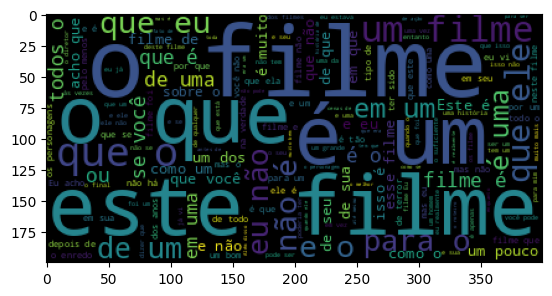

In [17]:
# Vizualizando a nuvem de palavras
nuvem_palavras = WordCloud().generate(palavras)

plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

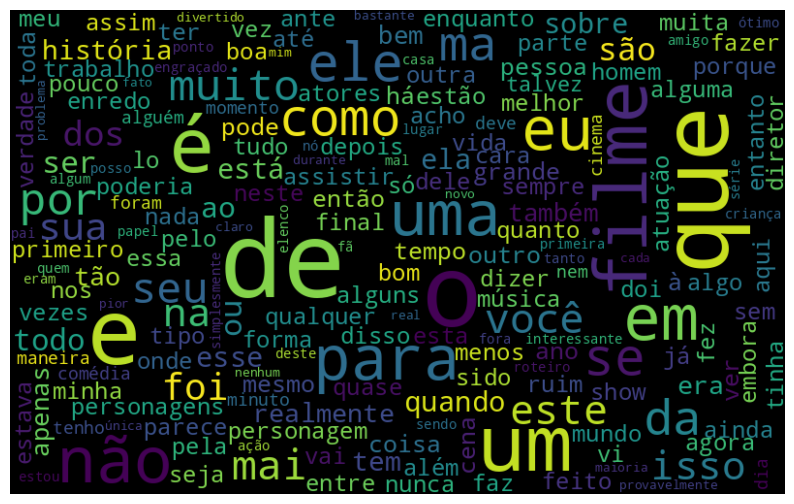

In [18]:
# Melhorando a vizualização da nuvem de palavras
nuvem_palavras2 = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(palavras)

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras2, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [19]:
# Separando por tipo (negativo e positivo)

resenha.query("sentiment == 'pos'").head()

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1


In [20]:
resenha.query("sentiment != 'pos'").head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [21]:
def nuvem_palavras_neg(coluna_corpus, data = resenha):
     texto_negativo = data.query("sentiment != 'neg'")
     palavras = ' '.join([corpus for corpus in texto_negativo[coluna_corpus]])
     nuvem_palavras2 = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(palavras)

     plt.figure(figsize=(10,7))
     plt.imshow(nuvem_palavras2, interpolation = 'bilinear')
     plt.title("Nuvem de Palavras Negativas")
     plt.axis("off")
     plt.show()

In [22]:
def nuvem_palavras_pos(coluna_corpus, data = resenha):
     texto_positivo = data.query("sentiment != 'pos'")
     palavras = ' '.join([corpus for corpus in texto_positivo[coluna_corpus]])
     nuvem_palavras2 = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(palavras)

     plt.figure(figsize=(10,7))
     plt.imshow(nuvem_palavras2, interpolation = 'bilinear')
     plt.title("Nuvem de Palavras Positivas")

     plt.axis("off")
     plt.show()

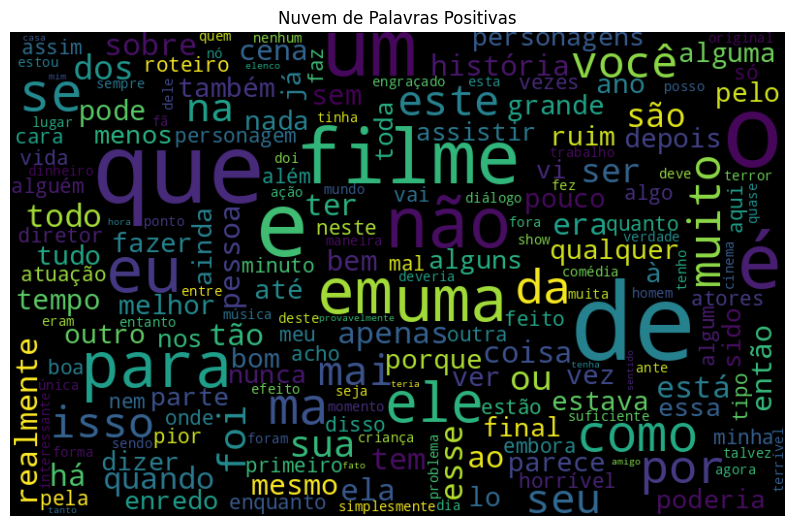

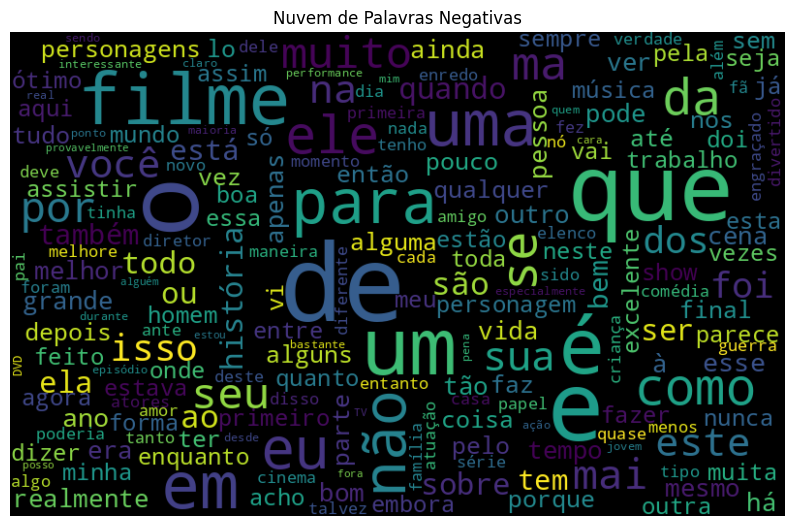

In [23]:
nuvem_palavras_pos('text_pt')
nuvem_palavras_neg('text_pt')

## **Aula 4: Tokenização - NLTK**

In [31]:
import nltk 

frase = ["um filme bom", "um filme ruim"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [25]:
from nltk import tokenize

frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']

In [26]:
# Aplicando Tokenização

token_corpus = token_espaco.tokenize(palavras)
frequencia = nltk.FreqDist(token_corpus)
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})

df_frequencia.nlargest(columns = 'Frequência', n = 10)

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


## **Aula 5: Nova vizualização e os stop words**

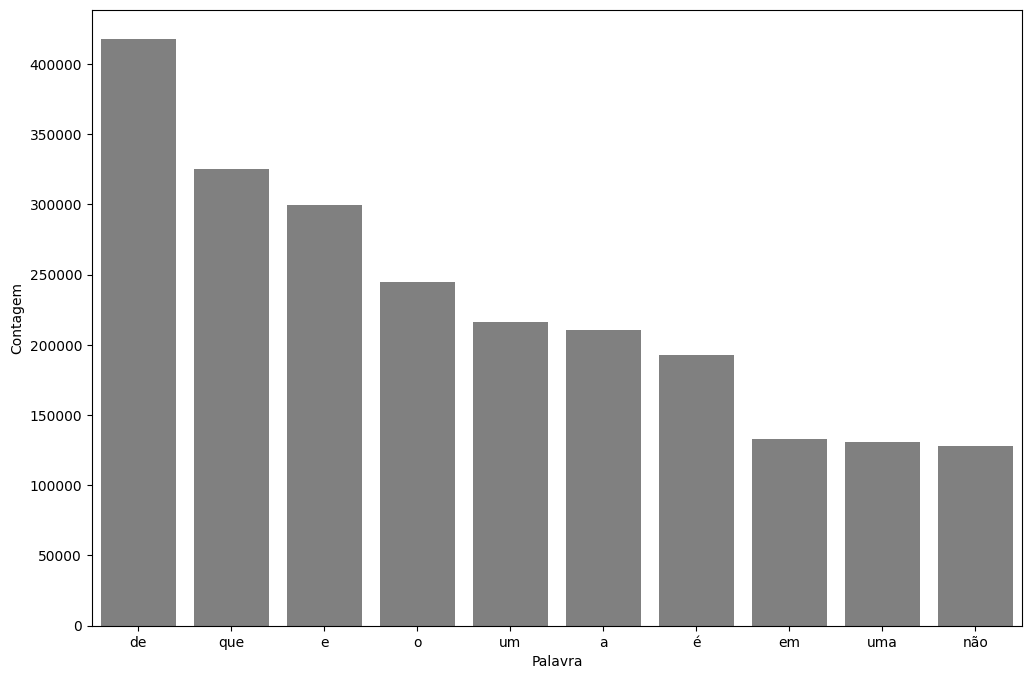

In [29]:
import seaborn as sns

def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

pareto(resenha, "text_pt", 10)

In [38]:
from nltk.corpus import stopwords

palavras_irrelevantes = stopwords.words('portuguese')
print(palavras_irrelevantes)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [39]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [40]:
frase_processada = list()
for opiniao in resenha.text_pt:
     nova_frase = list()
     palavras_texto = token_espaco.tokenize(opiniao)
     for palavra in palavras_texto:
          if palavra not in palavras_irrelevantes:
               nova_frase.append(palavra)
               
     frase_processada.append(' '.join(nova_frase))
     
resenha['tratamento_1'] = frase_processada

In [41]:
classificar_texto(resenha, 'tratamento_1', 'classificacao')

0.681

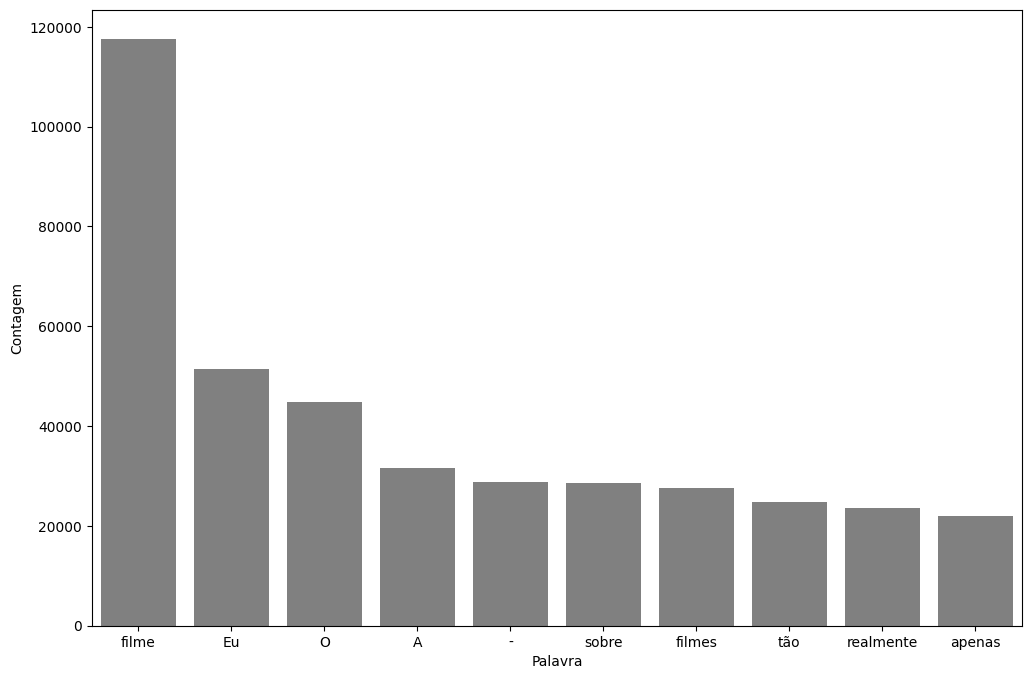

In [43]:
pareto(resenha, 'tratamento_1', 10)